In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# IRIS-FLOWER-CLASSIFICATAION

In [2]:
data=pd.read_csv("IRIS.csv")

In [3]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.dropna(inplace=True)

In [5]:
data["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species'>

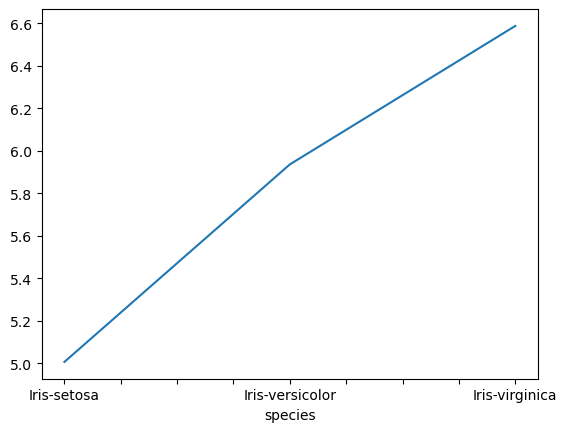

In [6]:
data.groupby("species")["sepal_length"].mean().plot(kind="line")

<AxesSubplot:xlabel='species'>

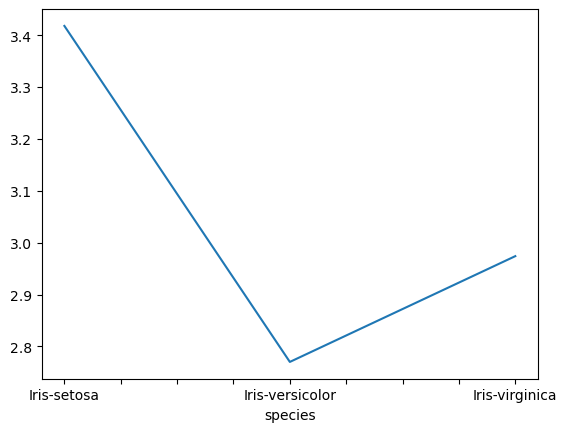

In [7]:
data.groupby("species")["sepal_width"].mean().plot(kind="line")

<AxesSubplot:xlabel='species'>

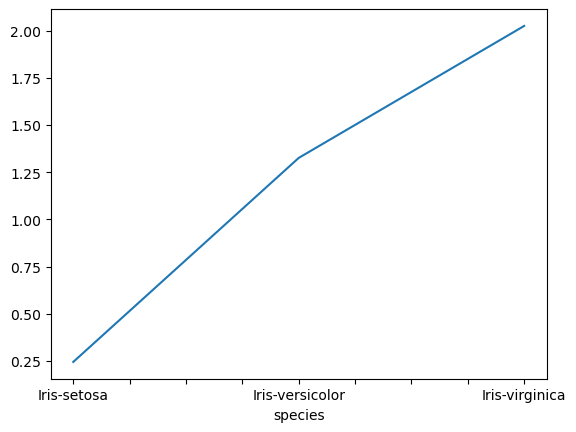

In [8]:
data.groupby("species")["petal_width"].mean().plot(kind="line")

<AxesSubplot:xlabel='species'>

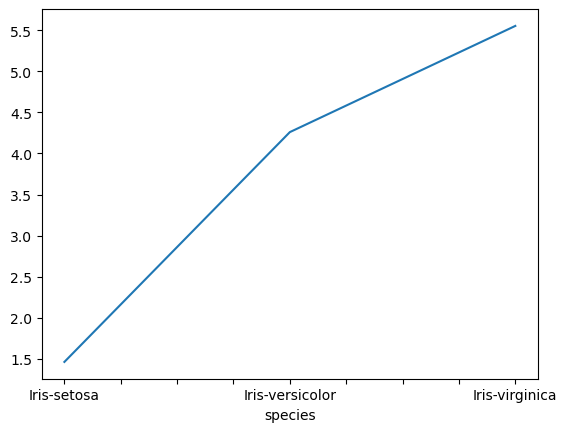

In [9]:
data.groupby("species")["petal_length"].mean().plot(kind="line")

In [10]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
rf=RandomForestClassifier()

In [12]:
data_y=data["species"]

In [13]:
data.drop("species",axis=1,inplace=True)

In [14]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
data_y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(data,data_y,test_size=0.3)

In [18]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
data_prediction=rf.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [22]:
print("The accuracy of random forest classifer is",accuracy_score(y_test,data_prediction))

The accuracy of random forest classifer is 0.9333333333333333


In [23]:
cm=confusion_matrix(y_test,data_prediction)

In [24]:
import seaborn as sns

<AxesSubplot:>

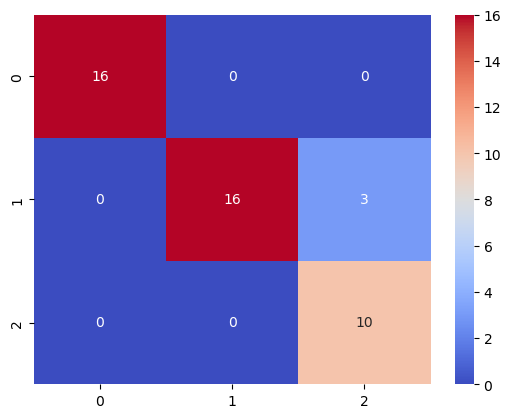

In [26]:
sns.heatmap(cm,annot=True,cmap='coolwarm')

# Automated functions for predicting 
1.When data is given
2.When single instance is a parameter

In [27]:
def predict_data(x,y,ml_model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    ml_model.fit(x_train,y_train)
    data_pred=ml_model.predict(x_test)
    print("The accuracy of the model is",accuracy_score(y_test,data_pred))
    cm=confusion_matrix(y_test,data_pred)
    sns.heatmap(cm,annot=True)

The accuracy of the model is 1.0


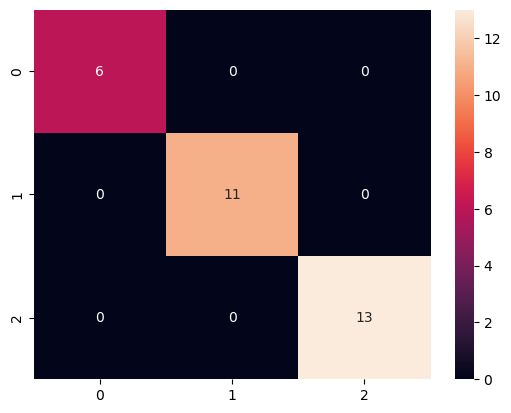

In [28]:
predict_data(data,data_y,rf)

In [29]:
def predict_instance(sep_len,sep_wid,pet_len,pet_wid,ml_model):
    res=[]
    res.extend(sep_len,sep_wid,pet_len,pet_wid)
    res_array=np.asarray(res)
    res_reshaped=res_array.reshape(1,-1)
    flower_class=ml_model.predict(res_reshaped)
    print("The classification result is",flower_class)

In [ ]:
predict_instance(0.2,0.)